<h2 style='color:green' align='center' ><font size="5.5">Classification of Monkeypox  Using Convolutional Neural Network (CNN)</font></h2>


<h2 style='color:gray' ><font size="3">Loading the image set and splits using 70% of the data for training and the remaining 30% for testing</font></h2>


In [1]:
import os
import splitfolders

input_dir = os.path.join(r'D:\datathon 2022 dataset\Data')
output_dir = os.path.join(r'D:\datathon 2022 dataset\Data_Split')

splitfolders.ratio(input_dir, output=output_dir, seed=1337, ratio=(.7,.3), group_prefix=None)

In [2]:
train_dir = os.path.join(r'D:\datathon 2022 dataset\Data_Split\train')
test_dir = os.path.join(r'D:\datathon 2022 dataset\Data_Split\val')

<h2 style='color:gray' ><font size="3">ImageDataGenerator class which is used to perform image augmentation and flow_from_directory to read the images from a big numpy array and folders containing images.</font></h2>


In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def image_generator(train_parent_directory, test_parent_directory):
    
    train_datagen = ImageDataGenerator(rescale=1/255)
    test_datagen = ImageDataGenerator(rescale=1/255)
    
    train_generator = train_datagen.flow_from_directory(train_parent_directory,
                                  target_size = (75,75),
                                  batch_size = 214,
                                  class_mode = 'categorical',
                                  subset='training')
 
    
    test_generator = test_datagen.flow_from_directory(test_parent_directory,
                                 target_size=(75,75),
                                 batch_size = 37,
                                 class_mode = 'categorical')    
    
    return train_generator, test_generator

In [4]:
train_generator, test_generator = image_generator(train_dir, test_dir)

Found 2086 images belonging to 5 classes.
Found 899 images belonging to 5 classes.


In [5]:
classes = ['Acne','Cyst, tumour and skin-tags','Melanoma','Moneypox','Normal skin']

<h2 style='color:gray' ><font size="3">Preparing traing and testing data sets as X_train,y_train,X_test ,y_test</font></h2>

In [6]:
import numpy as np

In [7]:
X_train=[]
for j in range(len(train_generator)):    
    for m in train_generator[j][0]: 
        X_train.append(m)
        

In [8]:
y_train=[]
for i in range(len(train_generator)):
    for k in train_generator[i][1]:  
            y_train.append(np.argmax(k))           


In [9]:
X_test=[]        
for j in range(len(test_generator)):    
    for m in test_generator[j][0]: 
        X_test.append(m)

In [10]:
y_test=[]
for i in range(len(test_generator)):
    for k in test_generator[i][1]:  
            y_test.append(np.argmax(k))
           

<h2 style='color:gray' ><font size="3">Converting the feature lists into a NumPy array.</font></h2>

In [11]:
X_train=np.array(X_train)
y_train=np.array(y_train)

X_test=np.array(X_test)
y_test=np.array(y_test)

In [12]:
X_train.shape

(2086, 75, 75, 3)

In [13]:
y_train.shape

(2086,)

<h2 style='color:gray' ><font size="3">Ploting sample images using matplotlib.pyplot</font></h2>

In [14]:
import keras
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [15]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

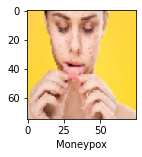

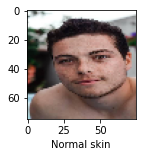

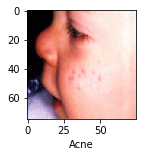

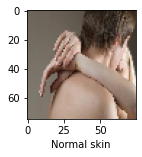

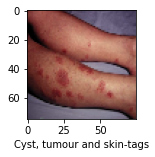

In [16]:
for i in range(5):    
    plot_sample(X_train, y_train, i)

<h2 style='color:gray' ><font size="3">Creating CNN usinga Sequential model by passing a list of layers to the Sequential constructor.</font></h2>

In [17]:
import tensorflow as tf
from tensorflow.keras import layers, models

In [18]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(75, 75, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(8, activation='softmax')
])

<h2 style='color:gray' ><font size="3">Show model summary</font></h2>

In [19]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 73, 73, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0

<h2 style='color:gray' ><font size="3"> Complieing the CNN model using Optimizer and loss function before training.</font></h2>

In [20]:
cnn.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

<h2 style='color:gray' ><font size="3">Fitting the dataset to train</font></h2>

In [21]:
history=cnn.fit(X_train, y_train, epochs=16)

Train on 2086 samples
Epoch 1/16
2086/2086 [==============================] - 5s 3ms/sample - loss: 1.4154 - accuracy: 0.3763
Epoch 2/16
2086/2086 [==============================] - 5s 3ms/sample - loss: 1.1237 - accuracy: 0.5182
Epoch 3/16
2086/2086 [==============================] - 5s 3ms/sample - loss: 1.0778 - accuracy: 0.5451
Epoch 4/16
2086/2086 [==============================] - 5s 3ms/sample - loss: 0.9969 - accuracy: 0.5849
Epoch 5/16
2086/2086 [==============================] - 5s 2ms/sample - loss: 0.9734 - accuracy: 0.5968
Epoch 6/16
2086/2086 [==============================] - 5s 2ms/sample - loss: 0.9198 - accuracy: 0.6299
Epoch 7/16
2086/2086 [==============================] - 5s 2ms/sample - loss: 0.8703 - accuracy: 0.6371
Epoch 8/16
2086/2086 [==============================] - 5s 2ms/sample - loss: 0.7747 - accuracy: 0.6846
Epoch 9/16
2086/2086 [==============================] - 5s 2ms/sample - loss: 0.7784 - accuracy: 0.6822
Epoch 10/16
2086/2086 [===================

<h2 style='color:gray' ><font size="3">Finding  model accuracy </font></h2>

In [22]:
accuracy=cnn.evaluate(X_test,y_test)[1]
print("\nModel Accuracy =", (accuracy * 100.0),"%") 

899/899 [==============================] - 1s 727us/sample - loss: 1.2282 - accuracy: 0.6318

Model Accuracy = 63.1813108921051 %


In [23]:
# calculates f1 for 1:100 dataset with 95tp, 5fn, 55fp
from sklearn.metrics import f1_score
# define actual
act_pos = [1 for _ in range(100)]
act_neg = [0 for _ in range(10000)]
y_true = act_pos + act_neg
# define predictions
pred_pos = [0 for _ in range(5)] + [1 for _ in range(95)]
pred_neg = [1 for _ in range(55)] + [0 for _ in range(9945)]
y_pred = pred_pos + pred_neg
# calculate score
score = f1_score(y_true, y_pred, average='binary')
print('F-Measure: %.3f' % score)

F-Measure: 0.760


In [ ]:
here we got overall accuray 63.18 and f1score 0.76

<h2 style='color:gray' ><font size="3">Visualizeing loss history </font></h2>

In [24]:
(history.history).keys()

dict_keys(['loss', 'accuracy'])

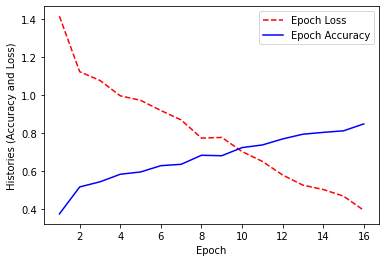

In [25]:
# Get accuracy and test loss histories
loss = history.history['loss']
accuracy = history.history['accuracy']

# Create count of the number of epochs
epoch_count = range(1, len(loss) + 1)

# Visualize loss history
plt.plot(epoch_count, loss, 'r--')
plt.plot(epoch_count, accuracy, 'b-')
plt.legend(['Epoch Loss', 'Epoch Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Histories (Accuracy and Loss)')
plt.show();

<h2 style='color:gray' ><font size="3">Checking model prediction</font></h2>

In [26]:
y_pred = cnn.predict(X_test)

In [27]:
y_classes = [np.argmax(element) for element in y_pred]

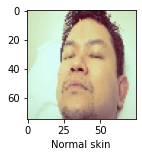

In [28]:
#Correct Anomalies 
plot_sample(X_test, y_test,4)

In [29]:
#Predict Anomalies by model
classes[y_classes[4]]

'Normal skin'

<h2 style='color:gray' ><font size="3">Computing confusion matrix to evaluate the accuracy of a classification.</font></h2>

In [32]:
classes

['Acne', 'Cyst, tumour and skin-tags', 'Melanoma', 'Moneypox', 'Normal skin']

In [33]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_classes)
cm

array([[ 64,  46,   0,   5,   3],
       [ 11, 124,   7,  24,  13],
       [  0,  12, 164,   3,   1],
       [ 10,  66,  13, 101,  21],
       [  8,  42,  10,  36, 115]], dtype=int64)

<h2 style='color:gray' ><font size="3">Visualizing model accuracy using seaborn heatmap</font></h2>

AttributeError: module 'matplotlib.pyplot' has no attribute 'get_xaxis'

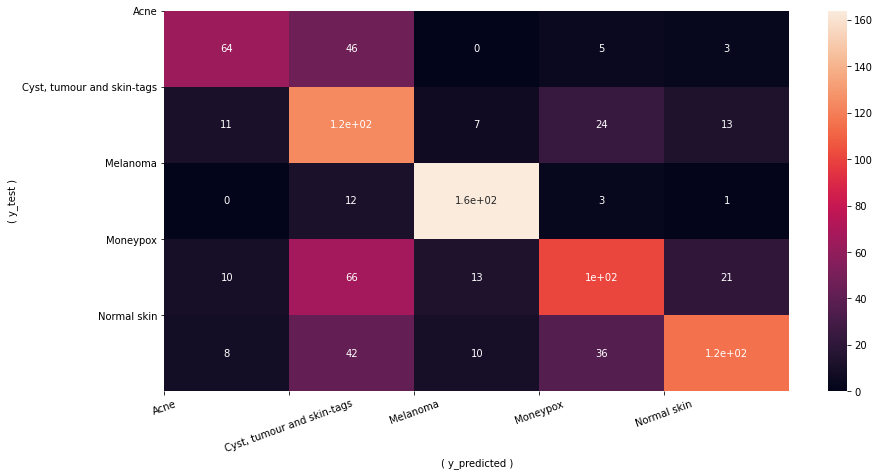

In [43]:
import seaborn as sns

plt.figure(figsize=(14,7))
sns.heatmap(cm,annot=True)

plt.ylabel('( y_test )')
plt.xlabel('( y_predicted )')
plt.xticks(range(len(classes)),classes, rotation=20)
plt.yticks(range(len(classes)),classes,rotation=0)
plt.get_xaxis().get_major_formatter().set_scientific(False)
plt.show()